In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show

---  

### 1. Getting the dataset and scale it using MInMaxScaler

+ Read More about the dataset from <a href='http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)'><strong> Here </strong></a>
+ This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. 


In [2]:
dataset = pd.read_csv('Australian_Credit_Approval.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(dataset.info())
print(X[1])
print(y[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
CustomerID    690 non-null int64
A1            690 non-null int64
A2            690 non-null float64
A3            690 non-null float64
A4            690 non-null int64
A5            690 non-null int64
A6            690 non-null int64
A7            690 non-null float64
A8            690 non-null int64
A9            690 non-null int64
A10           690 non-null int64
A11           690 non-null int64
A12           690 non-null int64
A13           690 non-null int64
A14           690 non-null int64
Class         690 non-null int64
dtypes: float64(3), int64(13)
memory usage: 86.3 KB
None
[1.5739548e+07 0.0000000e+00 2.2670000e+01 7.0000000e+00 2.0000000e+00
 8.0000000e+00 4.0000000e+00 1.6500000e-01 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 2.0000000e+00 1.6000000e+02 1.0000000e+00]
0


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X[1]

array([0.69609056, 0.        , 0.13413534, 0.25      , 0.5       ,
       0.53846154, 0.375     , 0.00578947, 0.        , 0.        ,
       0.        , 0.        , 0.5       , 0.08      , 0.        ])

---  
___

### 2. Using the MiniSom library Read more about it from [here](https://github.com/JustGlowing/minisom).  
1. we start by defining our Model som 
    - `x, y` dimensions of our map (with more data you need to put the values of `x, y` bigger)
    - `Sigma` represents The neighbourhood radius in which the winning node gonna update Values within this radius.
1. Then randomly intializing our weights.
1. train the model in our data X for 500 iterations

In [5]:
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=500)

---  
___

### 3. So, How to predict the frauds in the dataset ?

1. First let's plot a **2-D mapping** for all of the final winning nodes.
    - **Note** that every cell of this map represents a Winning node.
    - For each of these nodes we taking the MID (mean interneuron distance)
        - MID: the mean of distances of all the neuron around it (the winning node), inside the neighbourhood that we've just specified using sigma when we were creating the model
    - _**Conclusion**_: The majority of the winning nodes in some way representing the rules so the outliers will be different by breaking it.
        - the higher the MID is the more the winning node is an outlier (fraud), 
     
1. We've two cases here 
    1. The client cheated and get a negative result.
    2. The client cheated and get a **positive** result
        > That what we are trying to detect `cheater and get a positive result`

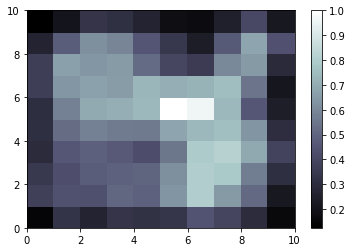

In [6]:
final_winning_nodes = som.distance_map().T
bone()
pcolor(final_winning_nodes)
colorbar() # adding legend

#### In order to catch a cheater with positive result, first We need to know which one get positive and which get negative.
- In order to do that we can assign:
    + Green Circle for any positive result
    + Red Square for any negative result
+ Notes:
    - som.winner(x) return tuple (row, coulmn) for which winning node belong that row of data.
+ _**Results**_
     > In the figure below the cell (5, 5) There is a group of Cheaters getting a positive results which say that the group of people in this cell must have been cheated and the bank must take a move on them, because they have _**a high MID and get a red circle**_.
     - Note (5, 5) -> (x_axis, y_axis) That is not a matrix that is a representaion on the x and y axis

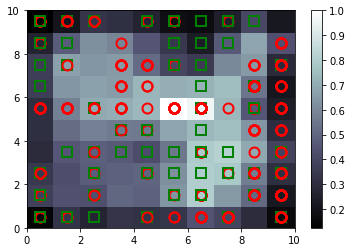

In [7]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

---  
___

### 4- After spotting outliers How to go further more and get a practical results

+ So how to get all the customers associated with This cell
    + We have a function `win_map(X)` in the class `som`, that takes all the data set(that've been trained on) and return dict to every cell in the map and with the elements associated to it

In [25]:
mappings = som.win_map(X)
mappings[(5, 5)][16] # the element num 16 that belong to the cell (5, 5)

array([0.9592278 , 0.        , 0.51759398, 0.04767857, 0.5       ,
       0.15384615, 0.75      , 0.01175439, 0.        , 0.        ,
       0.        , 0.        , 0.5       , 0.        , 0.0012    ])

Inverse transform the frauds to get back their actual values and get the actual ID of the client

In [26]:
frauds = mappings[(5,5)]
frauds = scaler.inverse_transform(mappings[(5, 5)])

In [29]:
print(frauds.shape[0])
frauds[:, 0:1]

17


array([[15706762.],
       [15672894.],
       [15783883.],
       [15756538.],
       [15651868.],
       [15716082.],
       [15651460.],
       [15672637.],
       [15769548.],
       [15752344.],
       [15736533.],
       [15779207.],
       [15611409.],
       [15752578.],
       [15636454.],
       [15615296.],
       [15805261.]])

#### Final Note: We have 17 suspected customer

Thanks for reading, Peace ^_^.